Logistic Regression Confusion Matrix:
 [[219  25]
 [ 30 119]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       244
           1       0.83      0.80      0.81       149

    accuracy                           0.86       393
   macro avg       0.85      0.85      0.85       393
weighted avg       0.86      0.86      0.86       393



D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


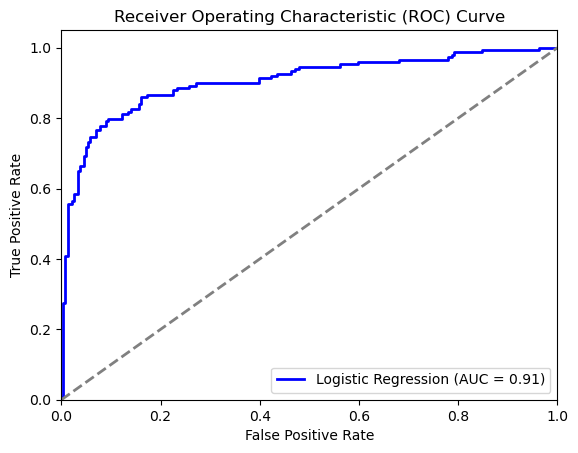

Decision Tree Confusion Matrix:
 [[216  28]
 [ 39 110]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       244
           1       0.80      0.74      0.77       149

    accuracy                           0.83       393
   macro avg       0.82      0.81      0.82       393
weighted avg       0.83      0.83      0.83       393



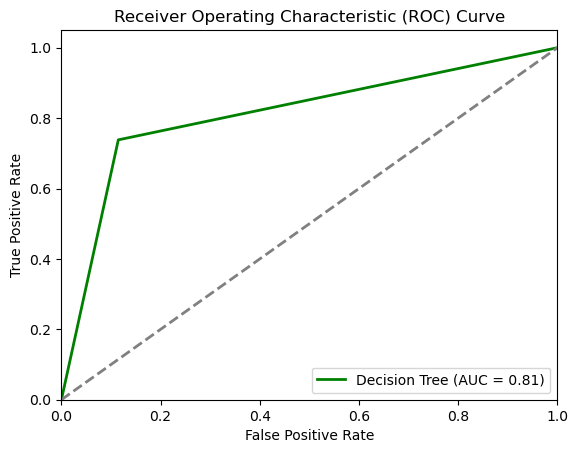

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
titanic_data = pd.read_excel("C:/Users/HP/Desktop/Rohan A3/TITANIC DATA.xlsx", sheet_name="Sheet1")

# Data preprocessing
# Convert categorical variables to numerical
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)
titanic_data.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

# Split data into features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred_logreg = logreg.predict(X_test)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Confusion Matrix and Classification Report
print("Logistic Regression Confusion Matrix:\n", conf_matrix_logreg)
print("\nLogistic Regression Classification Report:\n", report_logreg)

# ROC Curve and AUC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree Model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_clf.predict(X_test)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)
y_pred_prob_tree = tree_clf.predict_proba(X_test)[:, 1]

# Confusion Matrix and Classification Report for Decision Tree
print("Decision Tree Confusion Matrix:\n", conf_matrix_tree)
print("\nDecision Tree Classification Report:\n", report_tree)

# ROC Curve and AUC for Decision Tree
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot ROC Curve for Decision Tree
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
